In [42]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,10);


In [56]:
def leapfrog(x0, v0, deriv, eps=1.):
    v05 = v0  - eps / 2. * deriv(x0)
    # update the velocity by half a time step

    x1  = x0  + eps * v05
    # update the coordinate by a full step using the velocity at the middle of
    # the time step

    v1  = v05 - eps / 2. * deriv(x1)
    # update the velocity by further half of the step
    
    return x1, v1


def hmc(func, deriv, x0, nit=1000, eps=.4, nsteps=20, savepos=None):
    # Simple implementation of HMC 
    # Function arguments are Minus log (likelihood)
    # Gradient of minus log(likelihood)
    # number of iterations 
    # step size
    # Number of leap frog steps
    N = len(x0)

    curx = x0
    curv = np.random.normal(size=N)
    # random momentum/velocity

    curval = func(x0)
    res = [x0]

    for i in range(nit):
        newv = np.random.normal(size=N)
        # propose new random momentum/velocity

        newx, newnewv = curx, newv
        for j in range(nsteps):
            # do n-steps of the leapfrog
            newx, newnewv = leapfrog(newx, newnewv, deriv, eps=eps)
            if savepos is not None:
                ## save all the positions along the trajectory
                savepos.append(newx)
        newval = func(newx)
        # calculate the new value of the log-likelihood

        deltakin = 0.5 * (newnewv**2).sum() - 0.5 * (curv**2).sum()
        # delta in kinetic energy

        deltaE = (newval - curval) + deltakin
        # delta in total energy

        if np.log(np.random.uniform()) < min(-deltaE, 0):
            # accept with the probability of min(exp(-deltaE),1)
            curx, curv = newx, -newnewv
            curval = newval
            # accept
        res.append(curx)

    return np.array(res)

In [57]:
def logfunc1(x):
    # This should be our - log likelihood
    return 0.1*(x[0] - 1)**2 + 3 * x[1]**2

def derfunc1(x):
    # gradient of the -log(likelihood) w.r.t to the parameters
    grad = np.zeros(2)
    grad[0] = 2 * 0.1*(x[0]-1)
    grad[1] = 3*2*x[1]
    return grad

In [91]:
savepos=[]
ret = hmc(logfunc1, derfunc1, np.r_[0,0], 1000, eps=0.3, nsteps=10,savepos=savepos);
savepos=np.array(savepos)

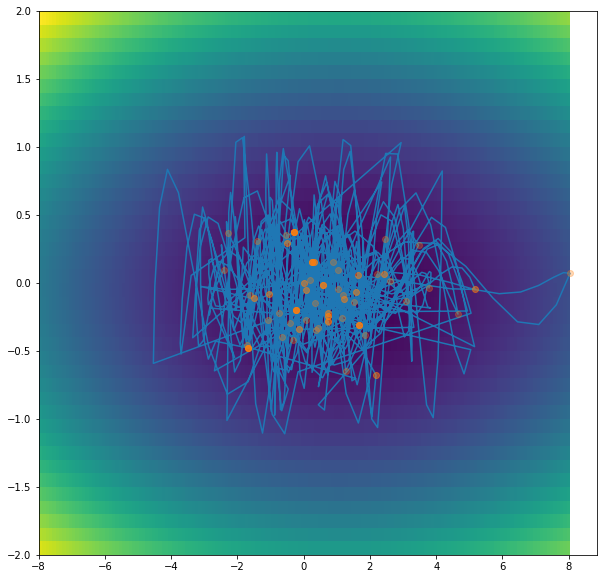

In [92]:
#savepos=np.array(savepos['x']);
#print (savepos)
xgrid,ygrid=np.mgrid[-8:8:0.1,-2:2:0.1]
plt.imshow(logfunc1(np.array([xgrid,ygrid]).reshape(2,-1)).reshape(xgrid.shape).T,extent=(-8,8,-2,2),aspect='auto')
plt.plot(savepos[:,0][:1000],savepos[:,1][:1000])
plt.plot(ret[:100,0],ret[:100,1],'o',alpha=0.3);

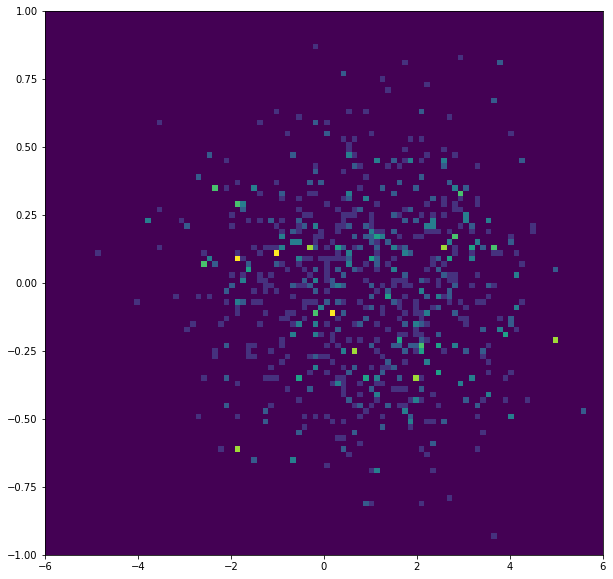

In [66]:
_tmp=plt.hist2d(ret[:,0], ret[:,1],bins=[100,100],range=[[-6,6],[-1,1]])

(-1, 1)

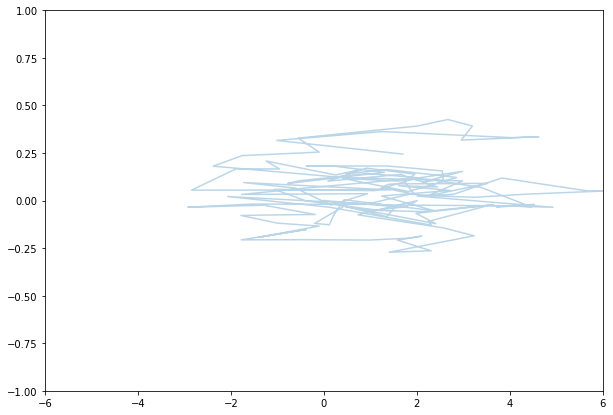

In [19]:
plt.plot(ret[:200,0],ret[:200,1],alpha=0.3);plt.xlim(-6,6);plt.ylim(-1,1)

(0, 2500)

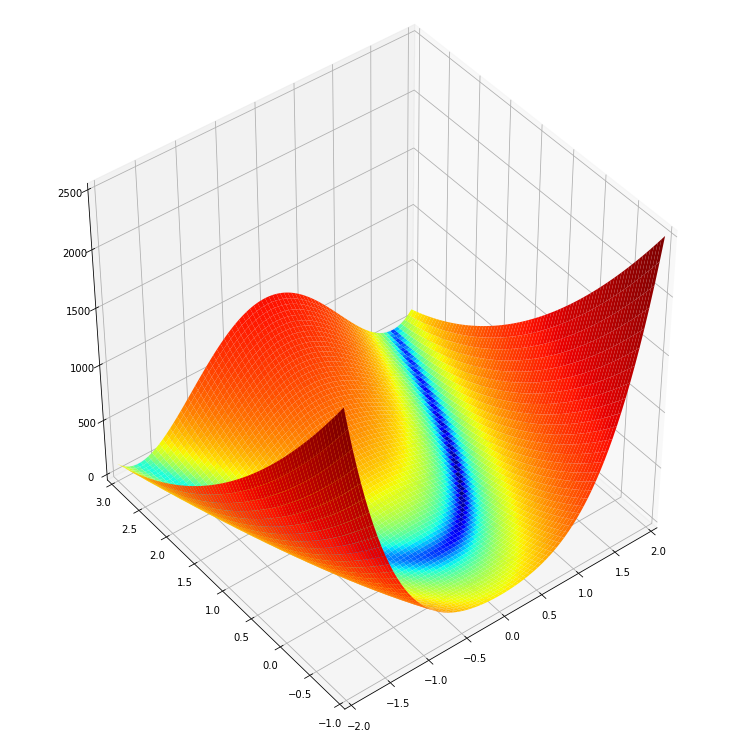

In [67]:

# Show rosenbrock function 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LogNorm
ax = Axes3D(plt.gcf(), azim = -128, elev = 43)
X = np.arange(-2, 2.+0.05,0.05)
Y = np.arange(-1, 3.+0.05,0.05)
X, Y = np.meshgrid(X, Y)
Z = (1.-X)**2 + 100.*(Y-X*X)**2
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, norm = LogNorm(), cmap = cm.jet, linewidth=0, edgecolor='none')
ax.set_xlim([-2, 2.0])                                                       
ax.set_ylim([-1, 3.0])                                                       
ax.set_zlim([0, 2500]) 

In [68]:
def logfunc2(x):
     # rosenbrock function
    xodd = x[::2]
    xeven = x[1::2]     # weird convention because starting from 1
    f = 100 * (xodd**2 - xeven)**2 + (xodd - 1)**2
    return f.sum()


def derfunc2(x):
    # derivative of the rosenbrock function
    xodd = x[::2]
    xeven = x[1::2]

    grad = np.zeros(len(x))
    grad[::2] = 400 * (xodd**2 - xeven) * xodd + 2 * (xodd - 1)
    grad[1::2] = 200 * (xeven - xodd**2)
    return grad


In [78]:
savepos2=[]
ret2=hmc(logfunc2, derfunc2, np.r_[0,0,0,0,0,0], 20000, nsteps=20, eps=0.02,savepos=savepos2)
savepos2=np.array(savepos2)


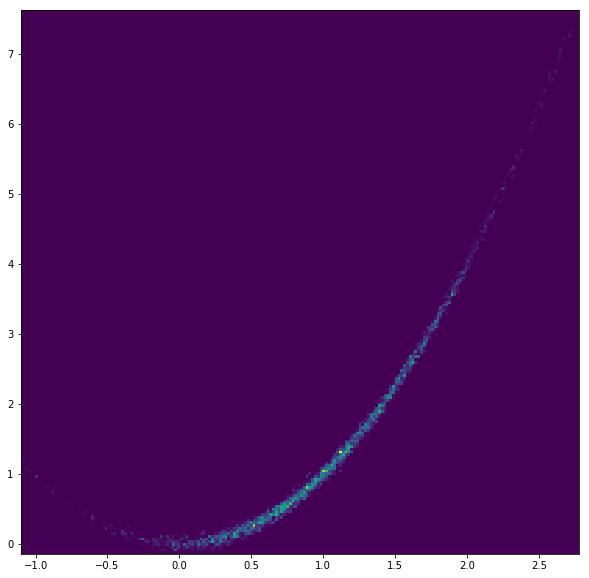

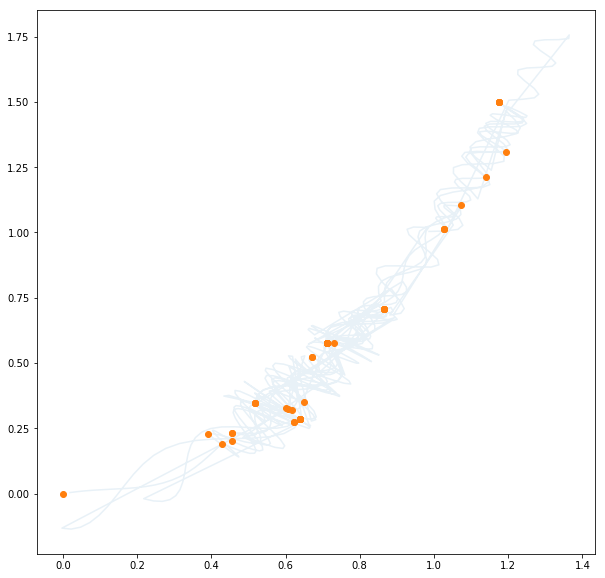

In [81]:
plt.plot(savepos2[:1000,0],savepos2[:1000,1],alpha=0.1)
plt.plot(ret2[:50,0],ret2[:50,1],'o')


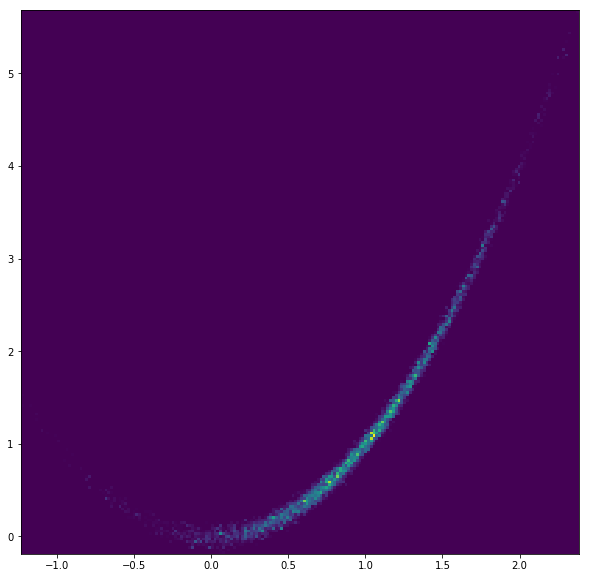

In [79]:
tmp=plt.hist2d(ret2[:,0],ret2[:,1],bins=[200,200])
